# KMeans Clustering

Loading Dataset

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score,normalized_mutual_info_score,adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Preprocessing and Normalization

In [16]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))


nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))


x_train = x_train/255
x_test = x_test/255

Mapping cluster to label

In [17]:
for counter in range(len(y_train)):
  print(y_train[counter]," ",counter)
  if counter == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [18]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

KMeans Clustering

In [26]:
n_clusters = len(np.unique(y_train))
kmeans = KMeans(n_clusters = n_clusters, random_state=4, init = np.array(cluster_array))

In [20]:
kmeans.fit(x_train)

C:\Users\hardikck\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]]),
    max_iter=300, n_clusters=10, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=4, tol=0.0001, verbose=0)

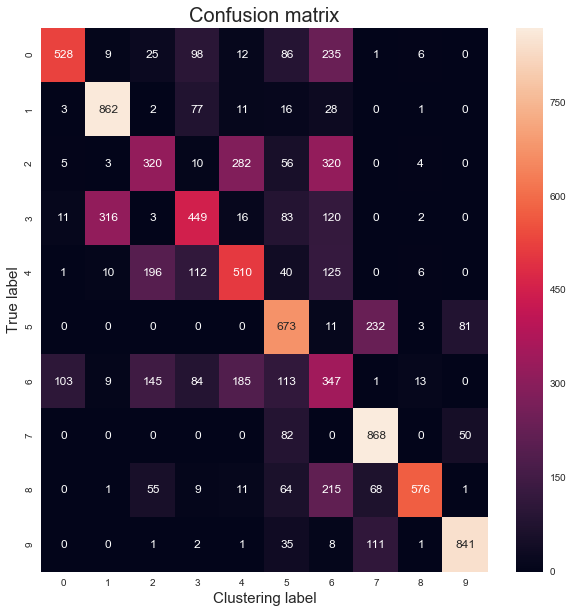

Accuracy: 59.74 %


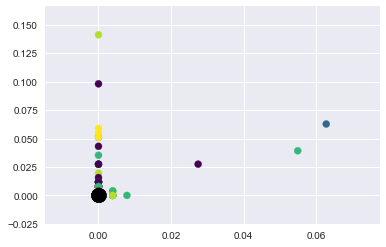

In [24]:
y_pred = kmeans.predict(x_test)

import seaborn as sns; sns.set()
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {} %'.format(accuracy*100))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='viridis')
my_center = kmeans.cluster_centers_
my_label = kmeans.labels_
plt.scatter(my_center[:, 0], my_center[:, 1], c='black', s=200, alpha=0.5);


# Auto-Encoder with KMeans Clustering

Loading Dataset

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_mutual_info_score


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


Preprocessing and Normalization

In [32]:
samples, x, y = x_train.shape
x_train = x_train.reshape((samples,x*y))

samples, x, y = x_test.shape
x_test = x_test.reshape((samples,x*y))

x_train = x_train/255
x_test = x_test/255

Map cluster to label

In [33]:
for label in range(len(y_train)):
  print(y_train[label]," ",label)
  if label == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [34]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

Auto encoder

In [35]:

encoder_input = Input(shape=(784,))

encoder_model = Dense(500, activation='relu')(encoder_input)
encoder_model = Dense(500, activation='relu')(encoder_model)
encoder_model = Dense(2000, activation='relu')(encoder_model)
encoder_model = Dense(10, activation='sigmoid')(encoder_model)

decoder_model = Dense(2000, activation='relu')(encoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(784)(decoder_model)

autoencoder = Model(encoder_input, decoder_model)

In [36]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1000500   
__________

In [37]:
encoder = Model(encoder_input, encoder_model)

In [41]:
autoencoder.compile(optimizer='adam', loss='mse')

In [48]:
train_history = autoencoder.fit(x_train, x_train, epochs=150, verbose=1, batch_size=2048, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 31s 521us/step - loss: 0.0153 - val_loss: 0.0156
Epoch 2/50
60000/60000 [==============================] - 30s 501us/step - loss: 0.0152 - val_loss: 0.0155
Epoch 3/50
60000/60000 [==============================] - 30s 497us/step - loss: 0.0151 - val_loss: 0.0156
Epoch 4/50
60000/60000 [==============================] - 29s 488us/step - loss: 0.0151 - val_loss: 0.0151
Epoch 5/50
60000/60000 [==============================] - 29s 489us/step - loss: 0.0150 - val_loss: 0.0153
Epoch 6/50
60000/60000 [==============================] - 29s 483us/step - loss: 0.0149 - val_loss: 0.0162
Epoch 7/50
60000/60000 [==============================] - 30s 492us/step - loss: 0.0151 - val_loss: 0.0149
Epoch 8/50
60000/60000 [==============================] - 30s 499us/step - loss: 0.0146 - val_loss: 0.0148
Epoch 9/50
60000/60000 [==============================] - 31s 520us/step - loss: 0.0147 - val_

In [49]:
pred_auto_train = encoder.predict(x_train)
encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cluster_pred_array = [pred_auto_train[1], pred_auto_train[16], pred_auto_train[27], pred_auto_train[20], pred_auto_train[29], pred_auto_train[13], pred_auto_train[18], pred_auto_train[6], pred_auto_train[23], pred_auto_train[0]]

C:\Users\hardikck\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


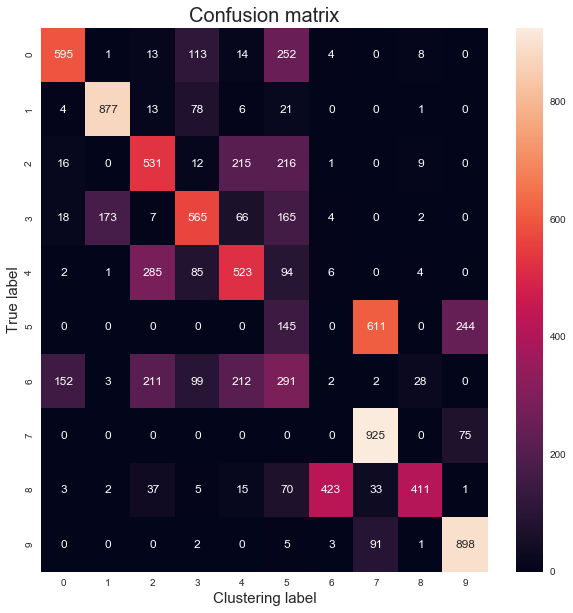

Accuracy: 54.72 %


In [50]:
km = KMeans(n_clusters=10, init = np.array(cluster_pred_array))
pred_auto = encoder.predict(x_test)
km.fit(pred_auto_train)
y_pred = km.predict(pred_auto)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {} %'.format(accuracy*100))


Text(0,0.5,'Training Loss')

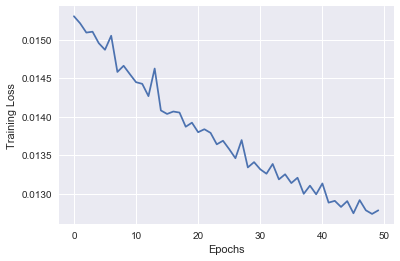

In [51]:
plt.plot(train_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Validation Loss')

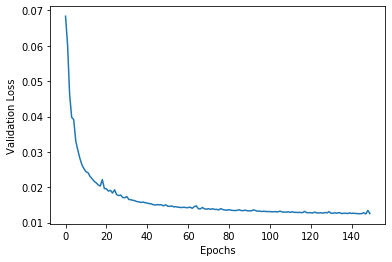

In [0]:
plt.plot(train_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

Text(0, 0.5, 'Training Accuracy')

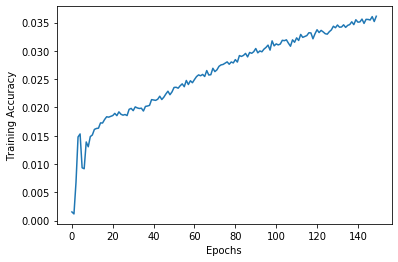

In [0]:
plt.plot(train_history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Validation Accuracy')

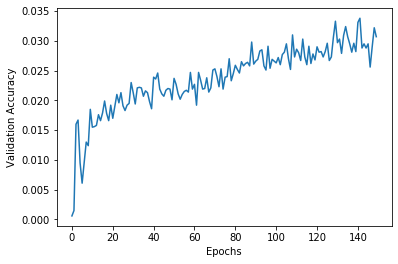

In [0]:
plt.plot(train_history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Auto Encoder with GMM

Import the required files and data

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


Update the dataset as required

In [53]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))


nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))


x_train = x_train/255
x_test = x_test/255

Map cluster to label

In [54]:
for counter in range(len(y_train)):
  print(y_train[counter]," ",counter)
  if counter == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [0]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

Create auto encoder

In [0]:
# this is our input placeholder
encoder_input = Input(shape=(784,))

# "encoder_model" is the encoded representation of the input
encoder_model = Dense(500, activation='relu')(encoder_input)
encoder_model = Dense(500, activation='relu')(encoder_model)
encoder_model = Dense(2000, activation='relu')(encoder_model)
encoder_model = Dense(10, activation='sigmoid')(encoder_model)

# "decoder_model" is the lossy reconstruction of the input
decoder_model = Dense(2000, activation='relu')(encoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(784)(decoder_model)

# this model maps an input to its reconstruction
autoencoder = Model(encoder_input, decoder_model)

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              22000     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               1000

In [57]:
#  this model maps an input to its encoded representation
encoder = Model(encoder_input, encoder_model)

In [58]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [59]:
train_history = autoencoder.fit(x_train, x_train, epochs=10, verbose=1, batch_size=2048, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 55s 916us/step - loss: 0.0212 - acc: 0.0283 - val_loss: 0.0150 - val_acc: 0.0276
Epoch 2/10
60000/60000 [==============================] - 50s 834us/step - loss: 0.0137 - acc: 0.0270 - val_loss: 0.0134 - val_acc: 0.0285
Epoch 3/10
60000/60000 [==============================] - 53s 882us/step - loss: 0.0128 - acc: 0.0304 - val_loss: 0.0131 - val_acc: 0.0302
Epoch 4/10
60000/60000 [==============================] - 52s 859us/step - loss: 0.0126 - acc: 0.0322 - val_loss: 0.0130 - val_acc: 0.0290
Epoch 5/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0125 - acc: 0.0326 - val_loss: 0.0130 - val_acc: 0.0301
Epoch 6/10
60000/60000 [==============================] - 50s 835us/step - loss: 0.0125 - acc: 0.0333 - val_loss: 0.0129 - val_acc: 0.0305
Epoch 7/10
60000/60000 [==============================] - 51s 844us/step - loss: 0.0125 - acc: 0.0332 - val_loss: 0.

In [60]:
pred_auto_train = encoder.predict(x_train)
encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cluster_pred_array = [pred_auto_train[1], pred_auto_train[16], pred_auto_train[27], pred_auto_train[20], pred_auto_train[29], pred_auto_train[13], pred_auto_train[18], pred_auto_train[6], pred_auto_train[23], pred_auto_train[0]]

In [61]:
km = KMeans(n_clusters=10, init = np.array(cluster_pred_array))
pred_auto = encoder.predict(x_test)
km.fit(pred_auto_train)
y_pred = km.predict(pred_auto)

C:\Users\hardikck\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Implementation of GMM

In [62]:
gmm = GaussianMixture(n_components = 10, n_init=1, means_init=cluster_pred_array)
k_means_gmm = gmm.fit(pred_auto_train)

y_gmm_train = k_means_gmm.predict(pred_auto_train)
y_gmm_test = k_means_gmm.predict(pred_auto)

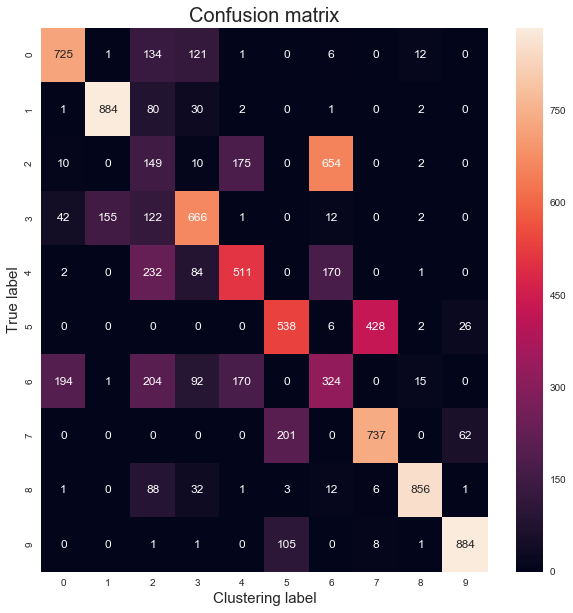

Training Accuracy: 62.89333333333333 %
Testing Accuracy: 62.739999999999995 %


In [63]:

cm = confusion_matrix(y_test, y_gmm_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

accuracy = accuracy_score(y_train, y_gmm_train)
print('Training Accuracy: {} %'.format(accuracy*100))

accuracy = accuracy_score(y_test, y_gmm_test)
print('Testing Accuracy: {} %'.format(accuracy*100))